## Hands-on - Probability Distributions and Variability

In [260]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns 

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv"
df = pd.read_csv(file_path)

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset
df['date'] = pd.to_datetime(df['date'])

Dataset Preview:
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


### **Question 1: Check for missing values**
- Check for any **missing values** in each colum.

In [261]:
# Your code here:
missing_count = df.isnull().sum()
print("Number of missing values:\n ", missing_count)


Number of missing values:
  date     0
value    0
dtype: int64


### **Question 2: Compute the Covariance Between Consecutive Days**
- Create a new column: **Previous Day Views"**, which contains the previous day's pageviews.
- Compute the covariance between **"value"** (current day's views) and **"Previous Day Views"**.


                           value  Previous Day Views
value               3.520547e+09        2.417820e+09
Previous Day Views  2.417820e+09        3.517486e+09


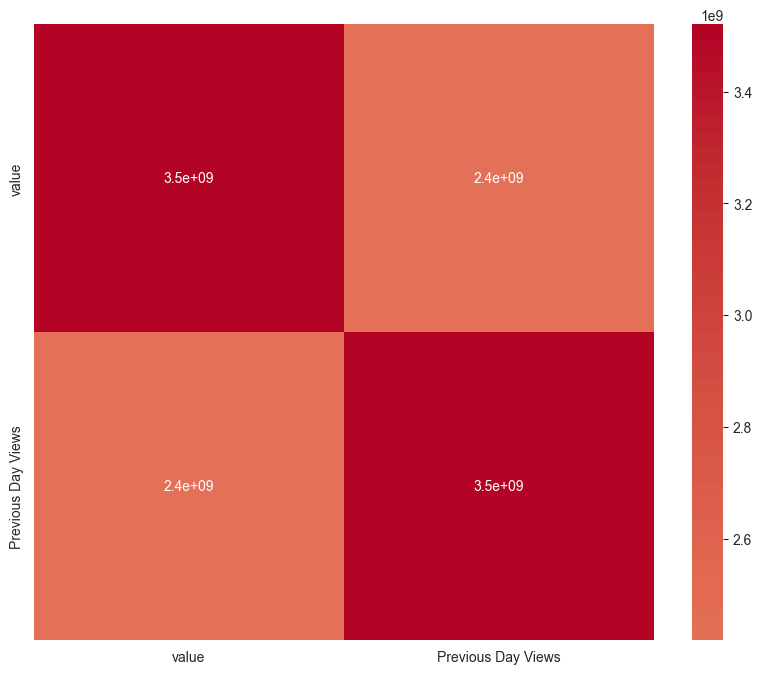

In [262]:
# Your code here:
df['Previous Day Views'] = df['value'].shift(1).astype('Int64')# shift value on day down to get previous day value and make it int

#calculate covariance

df = df.dropna()#drop first row with NA value
# calculate covariance values(matrix)
covariance_values = df[['value','Previous Day Views']].cov()

print(covariance_values)
plt.figure(figsize=(10,8))
sns.heatmap(covariance_values,annot=True,cmap="coolwarm",center=0)
plt.show()

#this shows that there is positive covariance between these two




### **Question 3: Compute Pearson, Spearman, and Kendall Correlation Between Pageviews and Previous Day Views**
- Compute and compare three different correlation measures.?


Pearson Correlation:
                        date     value  Previous Day Views
date                1.000000  0.574885            0.574567
value               0.574885  1.000000            0.687073
Previous Day Views  0.574567  0.687073            1.000000

Spearman Correlation:
                       date     value  Previous Day Views
date                1.00000  0.896830            0.896860
value               0.89683  1.000000            0.932921
Previous Day Views  0.89686  0.932921            1.000000

Kendall Correlation:
                        date     value  Previous Day Views
date                1.000000  0.722252            0.722363
value               0.722252  1.000000            0.788719
Previous Day Views  0.722363  0.788719            1.000000


<Figure size 1000x800 with 0 Axes>

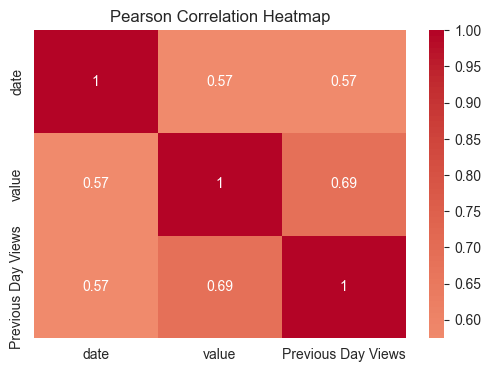

Pearson : 0.69 relationship => Moderate
Spearman : 0.93 relationship => Strong
Kendal : 0.79 relationship => Moderate


In [263]:

pearson_correlation = df.corr(method='pearson')# linear
spearman_correlation = df.corr(method='spearman')# rank-based
kendall_correlation = df.corr(method='kendall')# rank correlation


plt.figure(figsize=(10,8))
print("\nPearson Correlation:")
print(pearson_correlation)

print("\nSpearman Correlation:")
print(spearman_correlation)

print("\nKendall Correlation:")
print(kendall_correlation)



plt.figure(figsize=(6, 4))
sns.heatmap(pearson_correlation, annot=True, cmap="coolwarm", center=0)
# Add title
plt.title("Pearson Correlation Heatmap")

# Show plot
plt.show()

#function to check amount automaticaly
def checkRelationship(name,value):
    relationShip = None
    
    if value >= 0.80:
        relationShip ="Strong"
    elif 0.6 <= value <0.80:
        relationShip = "Moderate"

    elif 0.4 <= value <0.60:
        relationShip = "Weak"
    elif value< 0.4:
        relationShip = "Very Weak"
    print(f"{name} : {value:.2f} relationship => {relationShip}")
     
#get covariance values
pearson_covariance = pearson_correlation.loc['value', 'Previous Day Views']
spearman_covariance = spearman_correlation.loc['value', 'Previous Day Views']
kendall_covariance = kendall_correlation.loc['value', 'Previous Day Views']

#check amount of covariance
checkRelationship("Pearson",pearson_covariance)
checkRelationship("Spearman",spearman_covariance)
checkRelationship("Kendal",kendall_covariance)







### **Question 4: Train a Simple Linear Regression Model to Predict Pageviews**
- Convert **"date"** to numeric values (days since the start).
- Train a linear regression model to predict **"value"** (pageviews) using time.**.


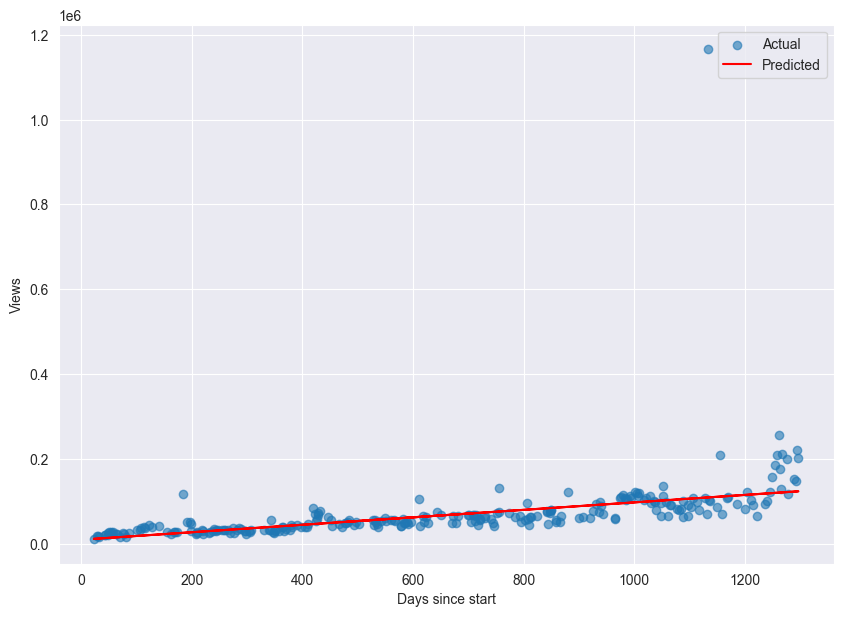

In [264]:
from sklearn.model_selection import train_test_split

start_date = df['date'].min()
df['days_since_start'] = (df['date'] - start_date).dt.days

df.head()


# set  x and y
# Reshape to 2D array because scikit-learn expects X to be in (n_samples, n_features) format
x = df[['days_since_start']]
y = df['value']

# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


#init and fit linear regression model
model = LinearRegression()
model.fit(x_train,y_train)


#predict values for the test set
y_pred = model.predict(x_test)


# make diagrams
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,label='Actual',alpha=0.6)
plt.plot(x_test, y_pred, color='red', label='Predicted')


plt.xlabel("Days since start")
plt.ylabel("Views")
plt.legend()
plt.show()











### **Question 5: Evaluate the Regression Model**
- Compute R-squared and Mean Squared Error (MSE).
- Discuss the model's performance.


In [265]:
# Your code here:
print("R-squared:", r2_score(y_test, y_pred)) # Proportion of variance explained
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Average squared error

# R-squared tells you how well your model explains the variability of the target variable.
# MSE measures the average squared difference between the predicted values and the actual values.
#Ideal values are as close as possible to zero
#Results show that predict only covers 22% of variance and Mean squared error is big. Taking outliers of the original data would improve some. But there is lots of variability in page views, so it is hard to predict.





R-squared: 0.22306018435634545
Mean Squared Error: 4865325347.541295


### **Question 6: Test Whether Pageviews Have Increased Over Time**
- Compare mean pageviews in the first 30 days vs. the last 30 days.
- Perform a one-sample T-test

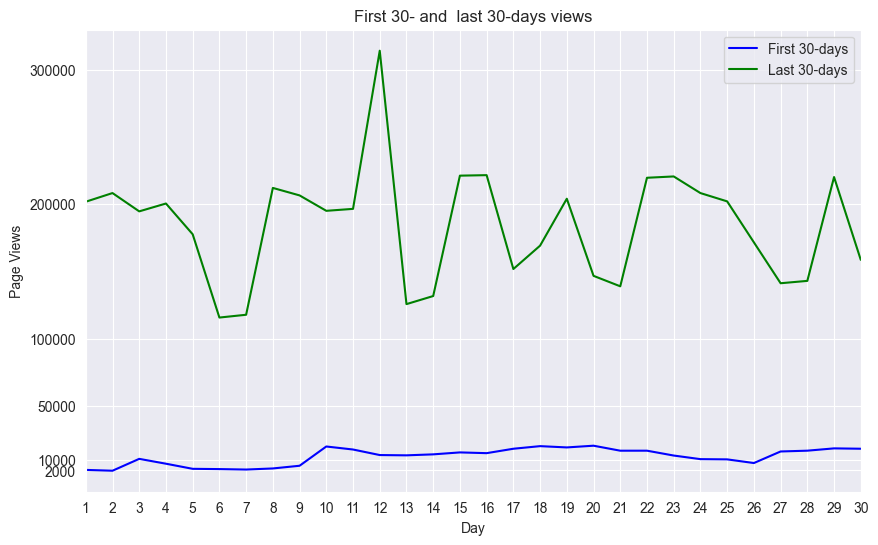

Mean pageviews per day:
First 30-days: 12245
Last 30-days: 184514

Kolmogorov-Smirnov test : p-value = 0.379


In [266]:
from scipy.stats import kstest
# Your code here:
from matplotlib.ticker import FuncFormatter
df_first30 = df.iloc[:30]# take first 30 rows
df_last30 = df.iloc[-30:]#tak last 30 rows
plt.figure(figsize=(10,6))

# days for diagram 1-30
x = list(range(1, 31)) 

# make diagram to start from 1 day not 0
plt.plot(x,df_first30['value'],label='First 30-days',color='blue')
plt.plot(x,df_last30['value'],label='Last 30-days',color='green')

#set x values for diagram
plt.xlim(1, 30)  
plt.xticks(x)   
#set y values for diagram
plt.yticks([ 2000, 10000, 50000, 100000, 200000, 300000])

plt.xlabel('Day')
plt.ylabel('Page Views')
plt.title('First 30- and  last 30-days views')
plt.legend()
plt.show()

df_first30_mean= df_first30['value'].mean()
df_last30_mean = df_last30['value'].mean()

print(f'Mean pageviews per day:\n'
      f'First 30-days: {df_first30_mean:.0f}\n'
      f'Last 30-days: {df_last30_mean:.0f}')



ks_stat,p_ks = kstest(
    df_last30['value'],'norm',args=(df_last30_mean,df_last30['value'].std()))

print(f"\nKolmogorov-Smirnov test last-30 days : p-value = {p_ks:.3f}")


























In [267]:
#because p-value is bigger than 0.05 we can assume that last 30 days views follows normal distribution